In [3]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [4]:
import sys
from functools import reduce
from operator import add
import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw
from swcgeom.transforms import Normalizer

In [5]:
swc1 = "101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "101711-11_16-of-16_initial.CNG.swc"

print tree: Neuron Tree with 161 nodes and 160 edges
print node: 1 1 7.7200 -20.9800 0.0000 22.3570 0
0 1 0.0000 0.0000 0.0000 22.3570 -1
1 1 7.7200 -20.9800 0.0000 22.3570 0
2 1 -7.7100 20.9700 0.0000 22.3570 0
Neuron tree with 160 segments, True
tips: 21


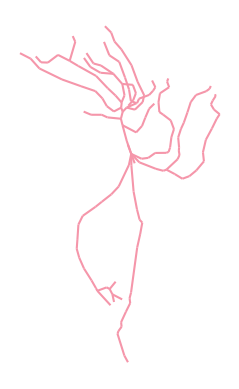

In [16]:
# create a tree
tree = swcgeom.from_swc(swc1)

# print tree
print("print tree:", tree)
print("print node:", tree[1])
for a in tree[:3]: print(a)

# generate swc file
# tree.to_swc("./test.swc")

len_segments = len(tree.get_segments())
eq = len_segments == tree.number_of_edges()
print(f"Neuron tree with {len_segments} segments,", eq)

# collect tips
tips = tree.traverse(leave=lambda cur, children: max(1, reduce(add, children, 0)))
print(f"tips: {tips}")

# darw
ax, lines = draw(tree)

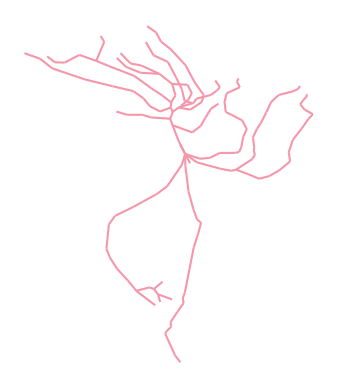

In [6]:
normalizer = Normalizer()
normalized_tree = normalizer(tree)
_, _ = draw(normalized_tree)

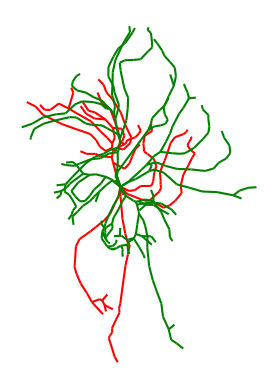

In [7]:
fig, ax = plt.subplots(1,1)
draw(swcgeom.from_swc(swc1), ax=ax, color="red")
draw(swcgeom.from_swc(swc2), ax=ax, color="green")
plt.show()